In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn import linear_model
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression ,Ridge ,Lasso
from sklearn.metrics import mean_squared_error, r2_score

np.random.seed(12)

In [3]:

df = pd.read_csv("/content/car_purchasing.csv", sep="\t", encoding='ISO-8859-1')
df.head()


,"customer name,customer e-mail,country,gender,age,annual Salary,credit card debt,net worth,car purchase amount"
0,"Martina Avila,cubilia.Curae.Phasellus@quisaccu..."
1,"Harlan Barnes,eu.dolor@diam.co.uk,Belize,0,40...."
2,"Naomi Rodriquez,vulputate.mauris.sagittis@amet..."
3,"Jade Cunningham,malesuada@dignissim.com,Cook I..."
4,"Cedric Leach,felis.ullamcorper.viverra@egetmol..."


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 1 columns):
 #   Column                                                                                                         Non-Null Count  Dtype 
---  ------                                                                                                         --------------  ----- 
 0   customer name,customer e-mail,country,gender,age,annual Salary,credit card debt,net worth,car purchase amount  500 non-null    object
dtypes: object(1)
memory usage: 4.0+ KB


In [5]:
df.describe()

,"customer name,customer e-mail,country,gender,age,annual Salary,credit card debt,net worth,car purchase amount"
count,500
unique,500
top,"Martina Avila,cubilia.Curae.Phasellus@quisaccu..."
freq,1


In [6]:
df.isnull().sum()

,0
"customer name,customer e-mail,country,gender,age,annual Salary,credit card debt,net worth,car purchase amount",0


In [7]:
df.duplicated().sum()

0

In [9]:
df.shape

(500, 1)

In [14]:
# Print the actual column names to identify the correct name
print(df.columns)


Index(['customer name,customer e-mail,country,gender,age,annual Salary,credit card debt,net worth,car purchase amount'], dtype='object')


In [22]:
# Reload the DataFrame, specifying the encoding
df = pd.read_csv('/content/car_purchasing.csv', delimiter=',', encoding='latin1')
# or encoding='ISO-8859-1', or 'cp1252' if 'latin1' doesn't work

# Check column names again
print(df.columns)


Index(['customer name', 'customer e-mail', 'country', 'gender', 'age',
       'annual Salary', 'credit card debt', 'net worth',
       'car purchase amount'],
      dtype='object')


In [24]:
# Assuming the first row of your CSV contains the desired column names
df = pd.read_csv('/content/car_purchasing.csv', delimiter=',', encoding='latin1', header=None)  # header=None to treat the first row as data
df.columns = df.iloc[0]  # Set the column names to the first row
df = df[1:]  # Remove the first row (which is now the header)
df = df.reset_index(drop=True)  # Reset the index

print(df.columns)

Index(['customer name', 'customer e-mail', 'country', 'gender', 'age',
       'annual Salary', 'credit card debt', 'net worth',
       'car purchase amount'],
      dtype='object', name=0)


In [25]:
df['country'].nunique()


211

In [26]:
df.country.mode()

,country
0,Bolivia
1,Israel
2,Mauritania


In [27]:
df.country.value_counts()

,count
country,
Israel,6
Mauritania,6
Bolivia,6
Greenland,5
Saint Barthélemy,5
...,...
El Salvador,1
Denmark,1
Oman,1


In [28]:
if "Palestine" in df.country:
    print("yes")
else:
    print("sorry, no")

sorry, no


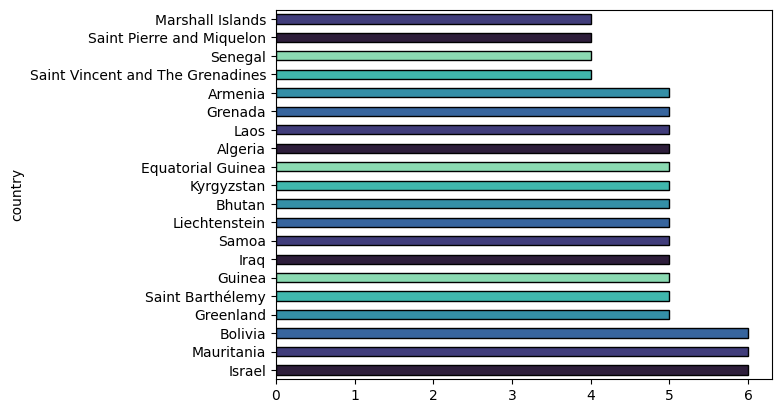

In [29]:
df.country.value_counts()[:20].plot(kind="barh",color=sns.color_palette("mako"),edgecolor="black");

In [31]:
import seaborn as sns
import pandas as pd

# Assuming 'df' is your DataFrame

# 1. Check the data types of the columns
print(df.dtypes)

# 2. Identify numerical columns
numerical_cols = df.select_dtypes(include=['number']).columns

# 3. If there are no numerical columns, consider converting relevant columns
#    to numerical data types or adding new numerical features to the DataFrame.
#    For example, if you have a column 'age_str' containing ages as strings:
#    df['age'] = pd.to_numeric(df['age_str'])

# 4. Create the pairplot using only the numerical columns
if len(numerical_cols) > 0:
    sns.pairplot(df[numerical_cols], kind="scatter")
else:
    print("No numerical columns found for pairplot.")

0
customer name          object
customer e-mail        object
country                object
gender                 object
age                    object
annual Salary          object
credit card debt       object
net worth              object
car purchase amount    object
dtype: object
No numerical columns found for pairplot.


In [32]:
for column in df.columns:
    if df[column].dtype!="object":
        plt.figure(figsize=(10,6))
        plt.subplot(1,2,1)
        sns.histplot(data=df,x=column,kde=True)
        plt.ylabel("freq")
        plt.xlabel(column)
        plt.title(f"distribution of {column}")
        plt.subplot(1,2,2)
        sns.boxplot(data=df,x=column)
        plt.ylabel(column)
        plt.title(f"boxplot of {column}")
        plt.show()

In [33]:
df.gender.value_counts()
# female --> 0
# male --> 1

,count
gender,
1,253
0,247


In [34]:
df=df.drop(["gender","country","customer name","customer e-mail"],axis=1)

In [35]:
df.corr()

,age,annual Salary,credit card debt,net worth,car purchase amount
0,,,,,
age,1.000000,0.000130,0.034721,0.020356,0.632865
annual Salary,0.000130,1.000000,0.049599,0.014767,0.617862
credit card debt,0.034721,0.049599,1.000000,-0.049378,0.028882
net worth,0.020356,0.014767,-0.049378,1.000000,0.488580
car purchase amount,0.632865,0.617862,0.028882,0.488580,1.000000


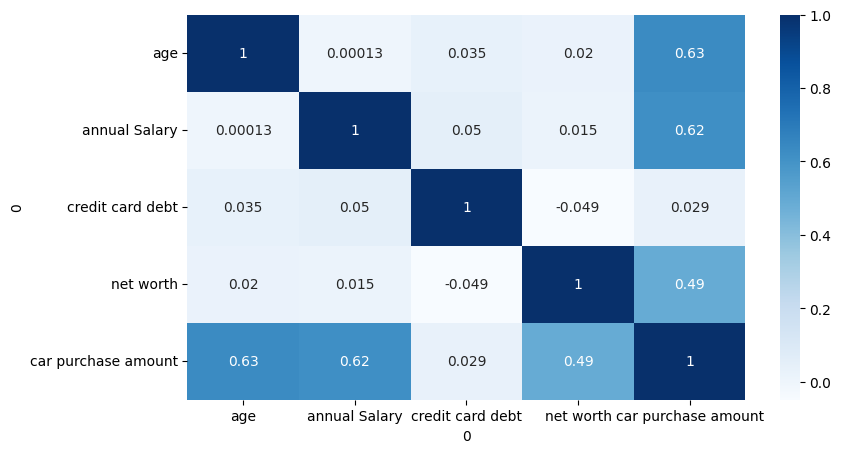

In [36]:
plt.figure(figsize=(9,5))
sns.heatmap(df.corr() ,annot=True, cmap="Blues");

In [37]:
x = df.drop('car purchase amount', axis=1)
y = df['car purchase amount']

In [38]:
x.shape

(500, 4)

In [39]:
y.shape

(500,)

In [40]:
scale=MinMaxScaler()
x=scale.fit_transform(x)
y=scale.fit_transform(y.values.reshape(-1,1))

In [41]:
x

array([[0.4370344 , 0.53515116, 0.57836085, 0.22342985],
       [0.41741247, 0.58308616, 0.476028  , 0.52140195],
       [0.46305795, 0.42248189, 0.55579674, 0.63108896],
       ...,
       [0.67886994, 0.61110973, 0.52822145, 0.75972584],
       [0.78321017, 0.37264988, 0.69914746, 0.3243129 ],
       [0.53462305, 0.51713347, 0.46690159, 0.45198622]])

In [42]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,shuffle=True,random_state=0)
print(f"x_train.shape: {x_train.shape}")
print(f"x_test.shape: {x_test.shape}")
print("_____________\n")
print(f"y_train.shape: {y_train.shape}")
print(f"y_test.shape: {y_test.shape}")

x_train.shape: (400, 4)
x_test.shape: (100, 4)
_____________

y_train.shape: (400, 1)
y_test.shape: (100, 1)


In [43]:
from sklearn.linear_model import LinearRegression
reg=LinearRegression()
reg.fit(x_train,y_train)

LinearRegression()

In [44]:
linear=reg.predict(x_test)
print(f"reg.score for test: {reg.score(x_test,y_test)}")
print(f"reg.score for train: {reg.score(x_train,y_train)}")

reg.score for test: 0.9999999793157544
reg.score for train: 0.9999999816626624


In [45]:
mean_squared_error(linear,y_test)

4.942037654697138e-10

In [46]:
r2_score(linear,y_test)

0.9999999793162833

In [47]:
print("----"*29)

--------------------------------------------------------------------------------------------------------------------


In [48]:
from sklearn.linear_model import Ridge
ridge=Ridge(alpha=0.001)
ridge.fit(x_train,y_train)

Ridge(alpha=0.001)

In [49]:
rge=ridge.predict(x_test)
print(f"ridge.score for test: {ridge.score(x_test,y_test)}")
print(f"ridge.score for train: {ridge.score(x_train,y_train)}")
mean_squared_error(rge,y_test)
r2_score(rge,y_test)
print("----"*29)

ridge.score for test: 0.9999999721670835
ridge.score for train: 0.9999999713002241
--------------------------------------------------------------------------------------------------------------------


In [50]:
from sklearn.linear_model import Lasso
lasso=Lasso(alpha=0.001)
lasso.fit(x_train,y_train)
lass=lasso.predict(x_test)
print(f"test lasso.score : {lasso.score(x_test,y_test)}")
print(f"train lasso.score : {lasso.score(x_train,y_train)}")
mean_squared_error(lass,y_test)
r2_score(lass,y_test)

test lasso.score : 0.9947914307866276
train lasso.score : 0.9948502039338222


0.9939551520570455

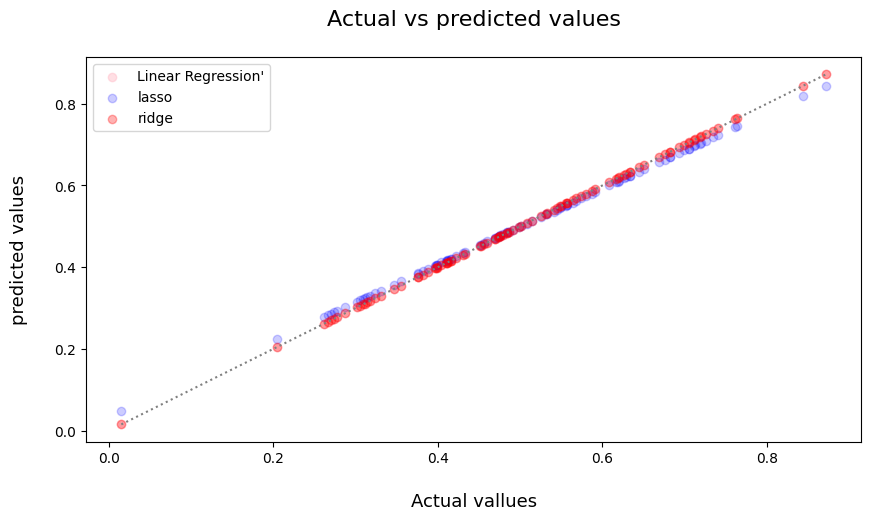

In [51]:
plt.figure(figsize=(10,5))
plt.scatter(y_test,linear,c="pink",alpha=0.5,label="Linear Regression'")
plt.scatter(y_test,lass,c="b",alpha=0.2,label="lasso")
plt.scatter(y_test,rge,c="r",alpha=0.3,label="ridge")
plt.plot([min(y_test),max(y_test)],[min(y_test),max(y_test)],linestyle=":",c="gray")
plt.xlabel("\nActual vallues",fontsize=13)
plt.ylabel("predicted values\n",fontsize=13)
plt.title("Actual vs predicted values\n",fontsize=16)
plt.legend();